[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sagar87/scCCA/blob/main/docs/notebooks/pancreas.ipynb)

<div class="admonition note">
    <p class="admonition-title">Note</p>
    <p>In order to run this notebook in Google Colab run the following cells. For best performance make sure that you run the notebook on a GPU instance, i.e. choose from the menu bar Runtime > Change Runtime > Hardware accelerator > GPU.</p> 
</div>

In [ ]:
# Install scPCA + dependencies
!pip install --quiet scpca scikit-misc

In [37]:
# download the human pancreas dataset
!wget https://figshare.com/ndownloader/files/24539828   # /content/pancreas.h5ad

# Integrating the human pancreas dataset

In [27]:
import scanpy as sc
import scpca as scp
import matplotlib.pyplot as plt

In [3]:
adata = sc.read_h5ad('/content/24539828')

In [10]:
adata.layers['counts'] = adata.layers['counts'].astype(int)

In [15]:
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=2000,
    flavor="seurat_v3",
    subset=True,
    layer="counts"
)

In [30]:
model = scp.scPCA(
    adata, 
    num_factors=15,
    layers_key='counts',
    loadings_formula='tech',
    intercept_formula='tech-1', 
    seed=313536
)

In [31]:
model.fit()

Epoch: 4990 | lr: 1.00E-02 | ELBO: 17607702 | Δ_10: 445640.00 | Best: 17265852: 100%|██████████| 5000/5000 [02:45<00:00, 30.22it/s] 


In [32]:
model.fit(num_epochs=15000, lr=0.001)

Epoch: 19990 | lr: 1.00E-03 | ELBO: 17801660 | Δ_10: -307346.00 | Best: 16966986: 100%|██████████| 15000/15000 [08:19<00:00, 30.01it/s]


In [33]:
model.mean_to_anndata(model_key='m0')

Predicting z for obs 14336-16381.: 100%|██████████| 8/8 [00:01<00:00,  5.34it/s]


In [34]:
adata

AnnData object with n_obs × n_vars = 16382 × 2000
    obs: 'tech', 'celltype', 'size_factors'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'm0', 'X_m0', 'umap', 'tech_colors', 'celltype_colors'
    obsm: 'X_m0', 'X_m0_umap'
    varm: 'W_m0'
    layers: 'counts'
    obsp: 'X_m0_distances', 'X_m0_connectivities'

In [35]:
scp.tl.umap(adata, 'm0')

/home/voehring/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/tmp/ipykernel_2018/130111341.py:2: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


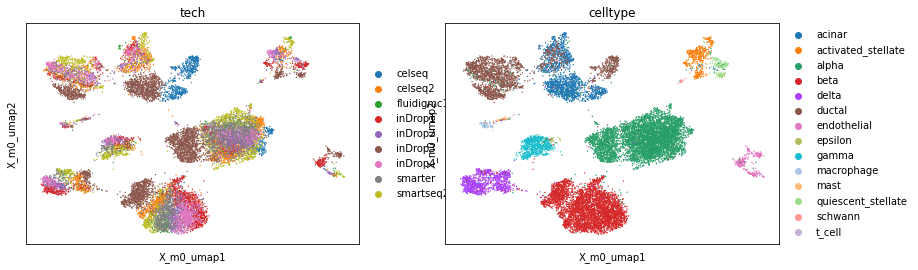

In [36]:
sc.pl.embedding(adata, basis='X_m0_umap', color=['tech', 'celltype'], show=False)
plt.tight_layout()